In [1]:
import sys
sys.path.append('../src')

import realvirtual_yolo as rvy

# YOLO Model Training

In [2]:
dataset_path = 'C:/Users/VincentRoller/Desktop/lego-demo/dataset.yaml'

In [3]:
model_export_folder = 'C:/Users/VincentRoller/Desktop/'
model_name = 'lego_demo_s'


In [4]:
# yolov8n, yolov8s, yolov8m, yolov8l, yolov8x
base_model_name = 'yolov10s'


In [5]:
run_folder = 'run'

In [6]:
rvy.pp.check_device()

Device          : NVIDIA GeForce RTX 3060 Laptop GPU
PyTorch version : 2.4.0
CUDA version    : 12.4
CUDNN version   : 90100


In [7]:
device = rvy.pp.get_device()
device

device(type='cuda')

### YOLOv8 by Ultralytics

See the [GitHub](https://github.com/ultralytics/ultralytics) page for details and the [Docs](https://docs.ultralytics.com/) for full documentation on training, validation, prediction and deployment.

`YOLOv8n` Smallest and fastest model, suitable for low-power devices and real-time applications.

`YOLOv8s` Medium-sized model with a good balance of speed and accuracy.

`YOLOv8m` Medium-sized model with slightly higher accuracy than YOLOv8s.

`YOLOv8l` Large model with high accuracy but slower speed.

`YOLOv8x` Extra-large model with the highest accuracy but the slowest speed.

In [8]:
from ultralytics import YOLO

In [9]:
available_models = ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x']

In [10]:
model = YOLO(f"{base_model_name}.pt") # load a pretrained model (recommended for training)
model.device

100%|██████████| 15.9M/15.9M [00:01<00:00, 12.8MB/s]


device(type='cpu')

In [11]:
model.to(device)
model.device

device(type='cuda', index=0)

In [12]:
conf = rvy.pp.load_yaml_config(dataset_path)
conf

{'path': 'C:/Users/VincentRoller/Desktop/lego-demo',
 'train': 'images/train',
 'val': 'images/val',
 'names': {0: '2x2', 1: '3x2', 2: '4x2', 3: '6x2'}}

In [13]:
samples = rvy.pp.get_sample_files(dataset_path, mode='val')

In [14]:
sample = samples[6]


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_108.bmp: 640x640 4 remotes, 13.2ms
Speed: 6.1ms preprocess, 13.2ms inference, 27.1ms postprocess per image at shape (1, 3, 640, 640)


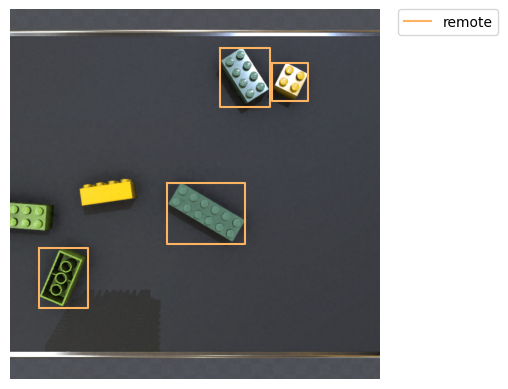

In [15]:
results = model.predict(
    sample,
    imgsz=640,  # default is 640
    conf=0.1,  # default is 0.25
)

rvy.show_results(results, model)

In [16]:
train_config = {
    'epochs': 20,
    'imgsz': 640,
    'freeze': 0,
    'cache': True,
}

See the full list of available training parameters in the [Documentation](https://docs.ultralytics.com/modes/train/#train-settings).

In [17]:
training_result = model.train(
    data=dataset_path,
    epochs=train_config['epochs'],
    batch=16,
    imgsz=train_config['imgsz'],
    workers=4,
    device=device,
    #fp16=True,
    project=run_folder,  # Specify the root folder to save the run
    name=model_name,  # The name of the run
    exist_ok=True,  # If True, continue training in the same folder if it exists
    plots=False,
    pretrained=True,
    freeze = train_config['freeze'],  # freeze first n layers
    cache=train_config['cache']  # Cache images for faster training

)

New https://pypi.org/project/ultralytics/8.2.95 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov10s.pt, data=C:/Users/VincentRoller/Desktop/lego-demo/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=cuda, workers=4, project=run, name=lego_demo_s, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=0, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

c:\Users\VincentRoller\miniconda3\envs\CUDA\lib\site-packages\ultralytics\engine\trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\Users\VincentRoller\Desktop\lego-demo\labels\train.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
train: Caching images (0.9GB RAM): 100%|██████████| 801/801 [00:01<00:00, 763.58it/s]
val: Scanning C:\Users\VincentRoller\Desktop\lego-demo\labels\val.cache... 199 images, 0 backgrounds, 0 corrupt: 100%|██████████| 199/199 [00:00<?, ?it/s]
val: Caching images (0.2GB RAM): 100%|██████████| 199/199 [00:00<00:00, 683.47it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to run\lego_demo_s
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.54G      2.412      7.255      2.648         12        640: 100%|██████████| 51/51 [00:23<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.95s/it]

                   all        199        898      0.333      0.401       0.32      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.29G      1.562      4.004      2.034         13        640: 100%|██████████| 51/51 [00:24<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.70s/it]


                   all        199        898       0.62      0.761      0.728      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.31G      1.332      2.862      1.895          7        640: 100%|██████████| 51/51 [00:26<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]


                   all        199        898      0.598      0.787      0.725      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.31G      1.271      2.407      1.859          5        640: 100%|██████████| 51/51 [00:26<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.88s/it]

                   all        199        898       0.87      0.868      0.939      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.28G      1.204      2.092      1.831          1        640: 100%|██████████| 51/51 [00:23<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        199        898      0.768      0.833      0.882      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       5.3G      1.124       1.85       1.79          6        640: 100%|██████████| 51/51 [00:22<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.39s/it]

                   all        199        898      0.775      0.839      0.886      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.31G      1.065       1.72      1.789          3        640: 100%|██████████| 51/51 [00:24<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.36s/it]

                   all        199        898      0.939      0.857       0.96      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.28G      1.063      1.571       1.78          3        640: 100%|██████████| 51/51 [00:24<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.34s/it]

                   all        199        898      0.946      0.894      0.971      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.29G      1.026      1.444      1.775         11        640: 100%|██████████| 51/51 [00:23<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:26<00:00,  3.81s/it]

                   all        199        898      0.896      0.898      0.963       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.33G      1.006      1.383      1.759          5        640: 100%|██████████| 51/51 [00:25<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        199        898       0.95      0.897      0.974      0.919


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      5.28G     0.8258      1.179      1.674          4        640: 100%|██████████| 51/51 [00:22<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        199        898      0.964      0.907      0.981      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.26G     0.8039       1.03      1.662          4        640: 100%|██████████| 51/51 [00:22<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        199        898      0.929       0.93      0.979      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.27G     0.7855      1.086      1.663          5        640: 100%|██████████| 51/51 [00:22<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.57s/it]

                   all        199        898       0.96      0.921      0.985      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.28G     0.7595     0.9299       1.66          5        640: 100%|██████████| 51/51 [00:22<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        199        898      0.946      0.903      0.975      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.28G     0.7321     0.9438      1.644          4        640: 100%|██████████| 51/51 [00:22<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]

                   all        199        898      0.961      0.915      0.983      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.26G     0.7055     0.7994      1.638          4        640: 100%|██████████| 51/51 [00:22<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]

                   all        199        898      0.967      0.913      0.984      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.27G     0.6799     0.7665      1.632          5        640: 100%|██████████| 51/51 [00:22<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        199        898      0.935      0.938      0.981      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.28G     0.6749     0.7634      1.638          5        640: 100%|██████████| 51/51 [00:22<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        199        898      0.943      0.945      0.986      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.28G     0.6599     0.7634      1.634          4        640: 100%|██████████| 51/51 [00:22<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.18s/it]

                   all        199        898      0.947      0.932      0.985       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.26G     0.6328     0.7251      1.624          3        640: 100%|██████████| 51/51 [00:25<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        199        898      0.966      0.928      0.986      0.964



20 epochs completed in 0.223 hours.
Optimizer stripped from run\lego_demo_s\weights\last.pt, 16.5MB
Optimizer stripped from run\lego_demo_s\weights\best.pt, 16.5MB

Validating run\lego_demo_s\weights\best.pt...
Ultralytics YOLOv8.2.83  Python-3.9.19 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv10s summary (fused): 293 layers, 8,038,056 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        199        898      0.967      0.928      0.987      0.964
                   2x2        139        224      0.958      0.942      0.988      0.943
                   3x2        135        213      0.979      0.897      0.982      0.964
                   4x2        139        214      0.954      0.916      0.985      0.973
                   6x2        153        247      0.975      0.956      0.992      0.977
Speed: 0.4ms preprocess, 7.4ms inference, 0.0ms loss, 0.4ms postprocess per image


In [24]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


summary_folder = f'{run_folder}/{model_name}/summary'
os.makedirs(summary_folder, exist_ok=True)

# get csv at run/trainig/results.csv
df = pd.read_csv(f'{run_folder}/{model_name}/results.csv')

# strip the whitespaces from the column names
df.columns = df.columns.str.strip()

# set high dpi for better quality
plt.rcParams['figure.dpi'] = 150

# create custom darkmode style
plt.style.use('dark_background')


style = sns.axes_style()
style['figure.facecolor'] = 'grey'
style['axes.facecolor'] = 'grey'
style['axes.edgecolor'] = 'white'
style['axes.labelcolor'] = 'white'
style['xtick.color'] = 'white'
style['ytick.color'] = 'white'
style['grid.color'] = 'white'
style['grid.linestyle'] = '--'

sns.set(style=style)


colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']


sns.lineplot(x=df['epoch'], y=df['train/box_loss'], data=df, label='Train', color=colors[0])
sns.lineplot(x=df['epoch'],  y=df['val/box_loss'], data=df, label='Validation', color=colors[1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Box Loss')
plt.margins(0)
plt.tight_layout()
plt.savefig(f'{summary_folder}/box_loss.png')
plt.clf()





sns.lineplot(x=df['epoch'], y=df['train/cls_loss'], data=df, label='Train', color=colors[0])
sns.lineplot(x=df['epoch'], y=df['val/cls_loss'], data=df, label='Validation', color=colors[1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Class Loss')
plt.margins(0)
plt.tight_layout()
plt.savefig(f'{summary_folder}/class_loss.png')
plt.clf()



metrics = []
for col in df.columns:
    if 'metrics' in col:
        metrics.append(col.removeprefix('metrics/'))

for metric in metrics:
    sns.lineplot(x=df['epoch'], y=df[f'metrics/{metric}'], data=df, color=colors[0])
    plt.xlabel('Epoch')
    plt.ylabel(metric.lower())
    plt.title(metric)
    plt.margins(0)
    plt.tight_layout()
    plt.savefig(f'{summary_folder}/{metric}.png')
    plt.clf()





<Figure size 960x720 with 0 Axes>

## Using the best model

In [25]:
model = YOLO(f"{run_folder}/{model_name}/weights/best.pt")
model.device

device(type='cpu')

In [26]:
model.to(device)
model.device

device(type='cuda', index=0)

In [27]:
export_root = f'{model_export_folder}/{model_name}'

import os
if not os.path.exists(export_root):
    os.makedirs(export_root)

model.export(format="onnx")  

onnx_path = f'{export_root}/{model_name}.onnx'

# delete the old onnx file if it exists
if os.path.exists(onnx_path):
    os.remove(onnx_path)
os.rename(f'{run_folder}/{model_name}/weights/best.onnx', onnx_path)





import shutil

# delete summary folder if it exists
if os.path.exists(f'{export_root}/summary'):
    shutil.rmtree(f'{export_root}/summary')


# copy summary folder from run folder to export root using os
shutil.copytree(f'{run_folder}/{model_name}/summary', f'{export_root}/summary')

import glob
# find meta files in the export folder
meta_files = glob.glob(f'{export_root}/summary/*.meta')


# delte all meta files

for meta_file in meta_files:
    os.remove(meta_file)
    






Ultralytics YOLOv8.2.83  Python-3.9.19 torch-2.4.0 CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)
YOLOv10s summary (fused): 293 layers, 8,038,056 parameters, 0 gradients, 24.5 GFLOPs

PyTorch: starting from 'run\lego_demo_s\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (15.8 MB)

ONNX: starting export with onnx 1.16.2 opset 19...
ONNX: export success  1.3s, saved as 'run\lego_demo_s\weights\best.onnx' (27.8 MB)

Export complete (4.0s)
Results saved to C:\Users\VincentRoller\wkspaces\game4automation-release\game4automation\realvirtual\Assets\realvirtual\Professional\VisionAI\python\notebooks\run\lego_demo_s\weights
Predict:         yolo predict task=detect model=run\lego_demo_s\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=run\lego_demo_s\weights\best.onnx imgsz=640 data=C:/Users/VincentRoller/Desktop/lego-demo/dataset.yaml  
Visualize:       https://netron.app


In [28]:
# Load the exported ONNX model
model = YOLO(onnx_path)

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


Loading C:\Users\VincentRoller\Desktop\lego_demo_s\lego_demo_s.onnx for ONNX Runtime inference...

image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_0.bmp: 640x640 1 2x2, 1 3x2, 4 6x2s, 114.6ms
Speed: 5.5ms preprocess, 114.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


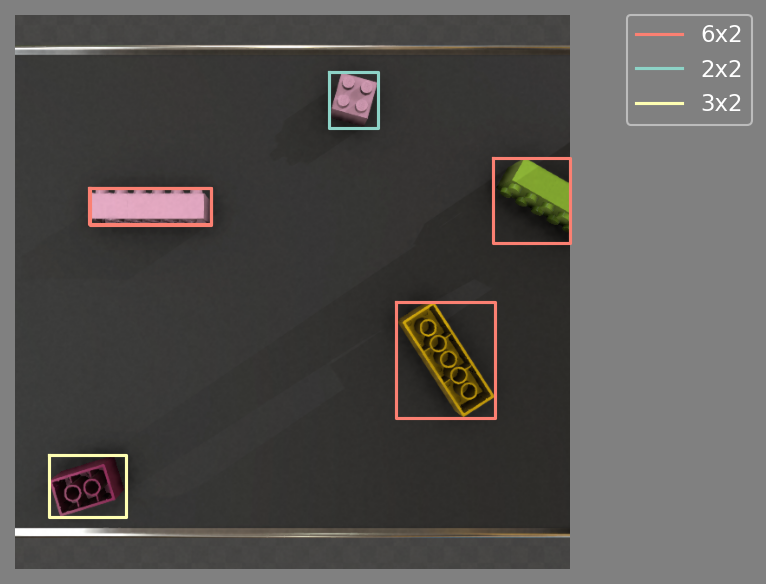


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_1.bmp: 640x640 1 2x2, 1 3x2, 2 6x2s, 104.5ms
Speed: 6.1ms preprocess, 104.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


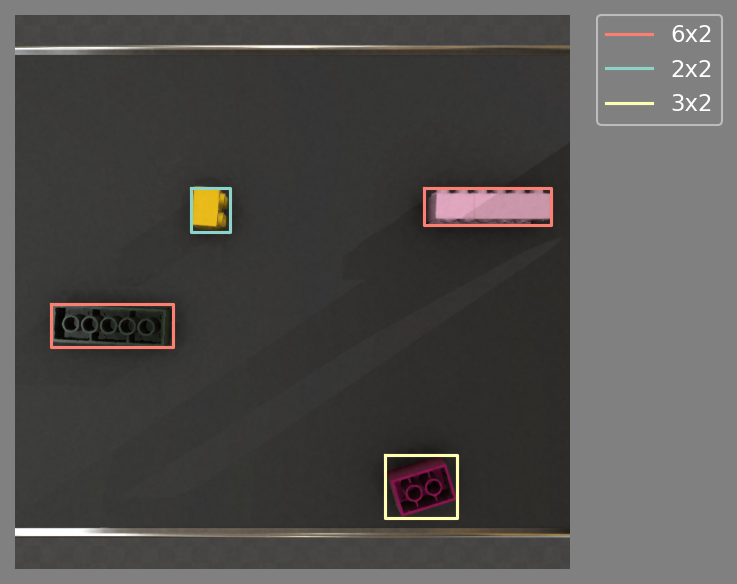


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_101.bmp: 640x640 1 2x2, 1 3x2, 3 4x2s, 1 6x2, 107.1ms
Speed: 44.1ms preprocess, 107.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


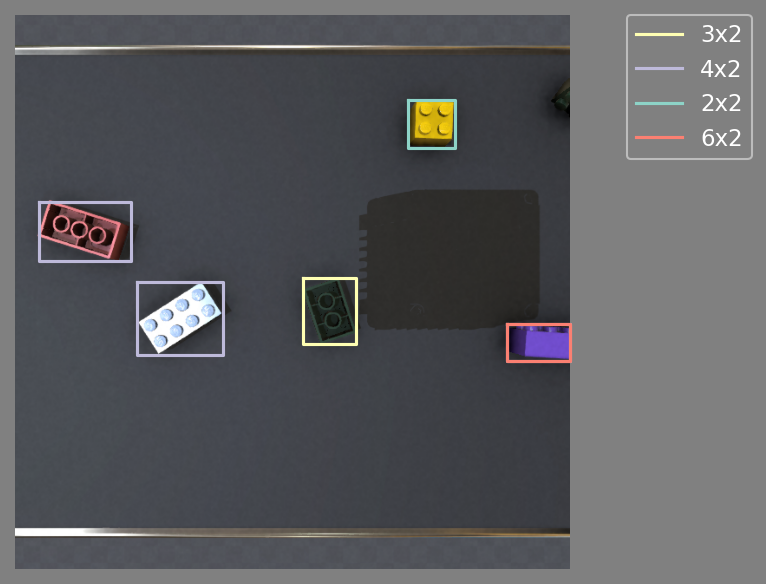


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_102.bmp: 640x640 2 2x2s, 1 3x2, 2 4x2s, 1 6x2, 163.9ms
Speed: 6.5ms preprocess, 163.9ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


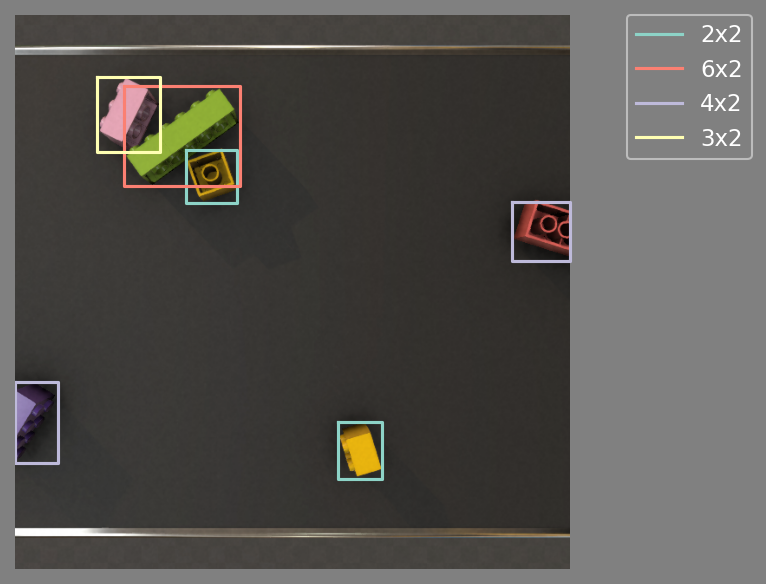


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_105.bmp: 640x640 1 2x2, 1 3x2, 2 4x2s, 1 6x2, 122.0ms
Speed: 7.5ms preprocess, 122.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


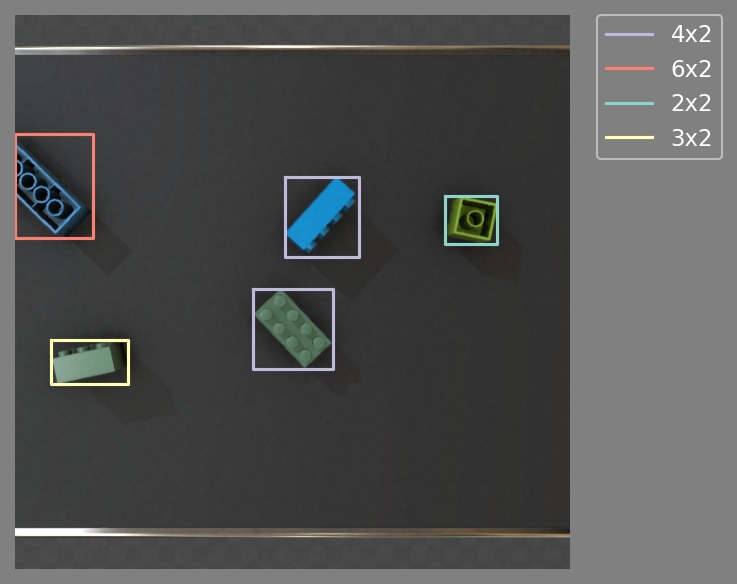


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_106.bmp: 640x640 4 3x2s, 1 4x2, 1 6x2, 101.8ms
Speed: 5.5ms preprocess, 101.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


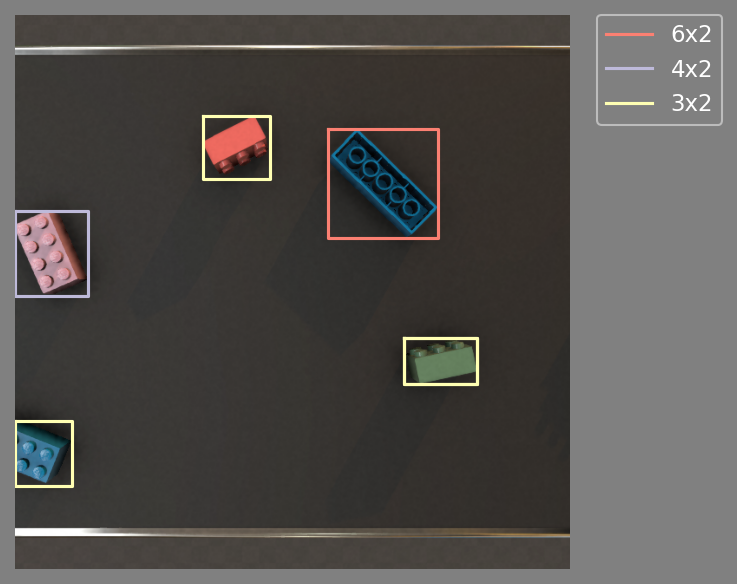


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_108.bmp: 640x640 1 2x2, 4 4x2s, 2 6x2s, 158.1ms
Speed: 5.0ms preprocess, 158.1ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)


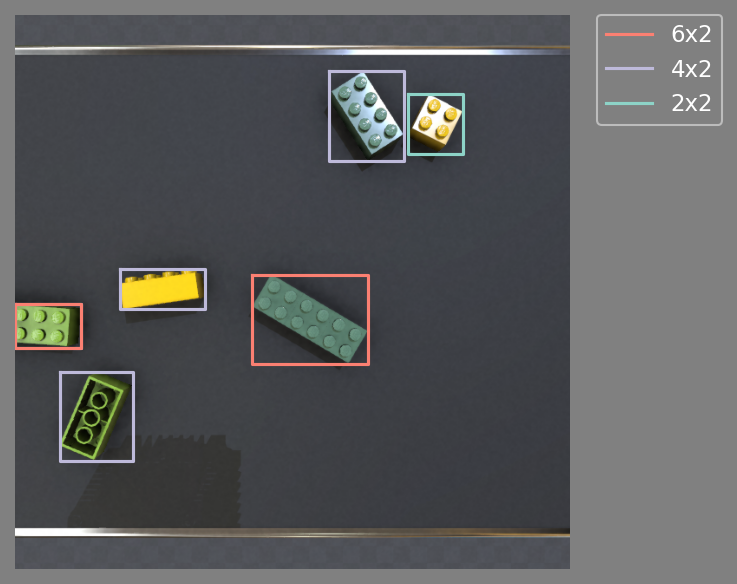


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_112.bmp: 640x640 3 2x2s, 2 3x2s, 1 4x2, 107.3ms
Speed: 5.3ms preprocess, 107.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


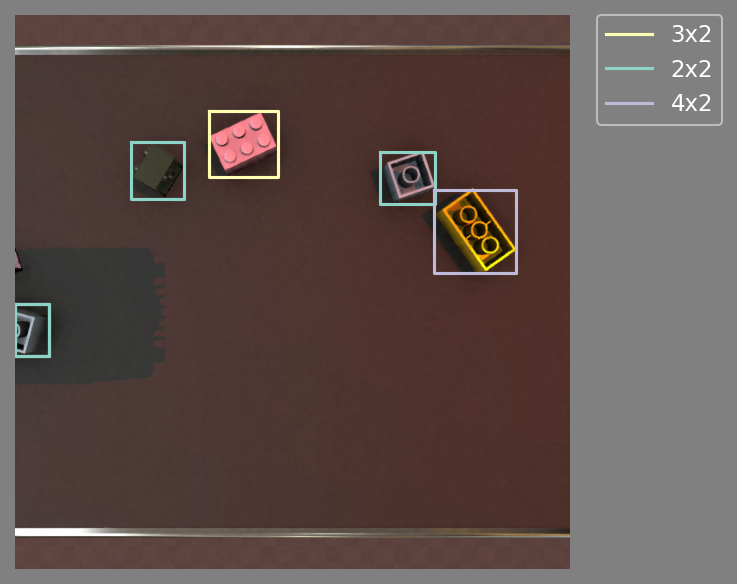


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_121.bmp: 640x640 2 2x2s, 1 4x2, 107.2ms
Speed: 5.6ms preprocess, 107.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


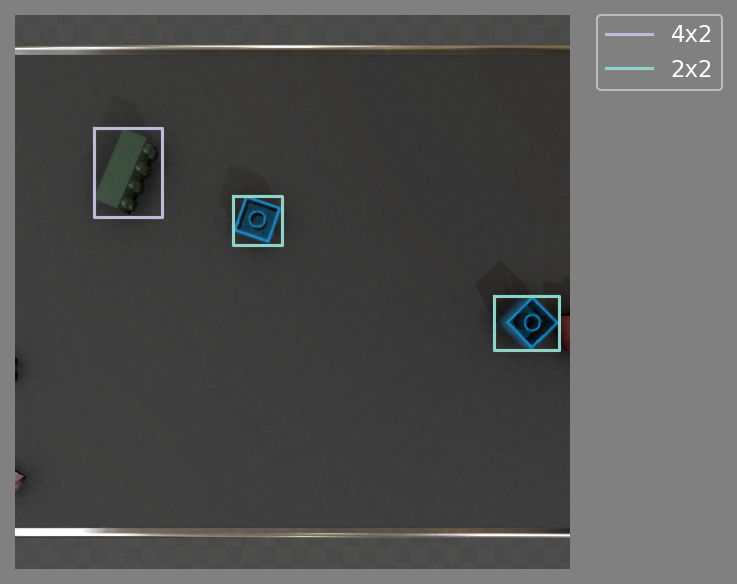


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_128.bmp: 640x640 2 2x2s, 1 3x2, 1 6x2, 105.1ms
Speed: 5.5ms preprocess, 105.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


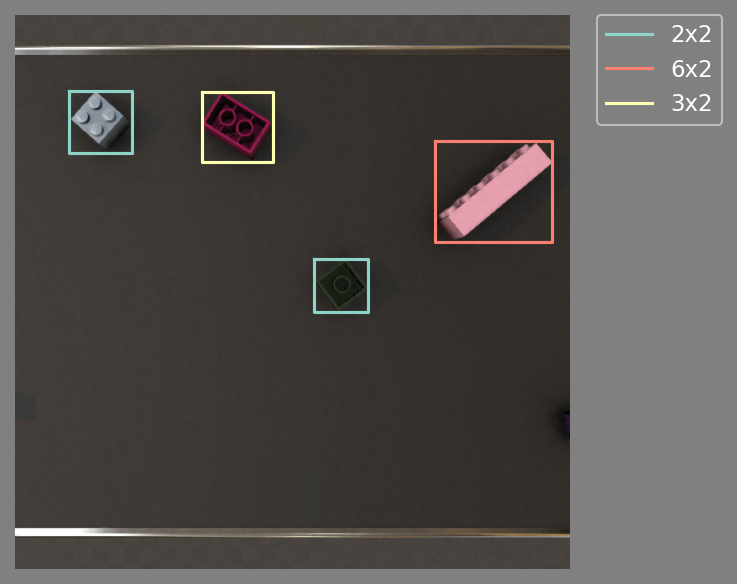


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_131.bmp: 640x640 2 2x2s, 1 3x2, 1 6x2, 212.1ms
Speed: 6.1ms preprocess, 212.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


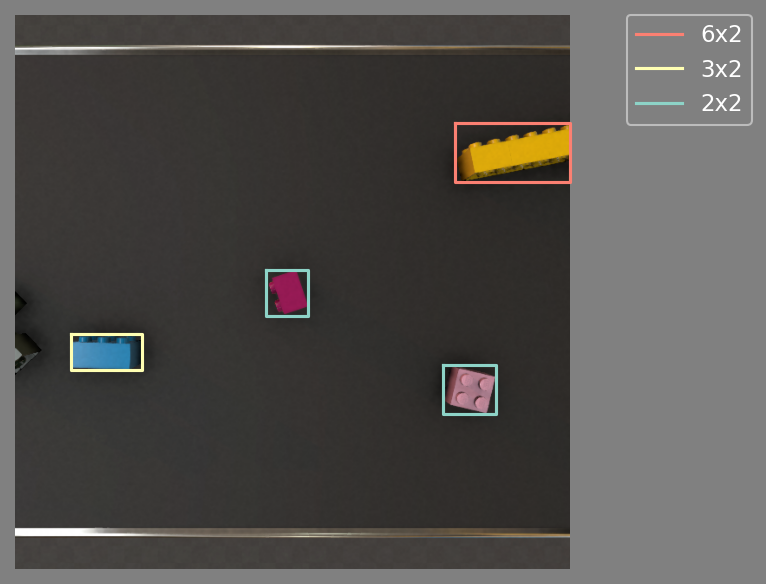


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_133.bmp: 640x640 2 2x2s, 1 3x2, 146.6ms
Speed: 6.0ms preprocess, 146.6ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


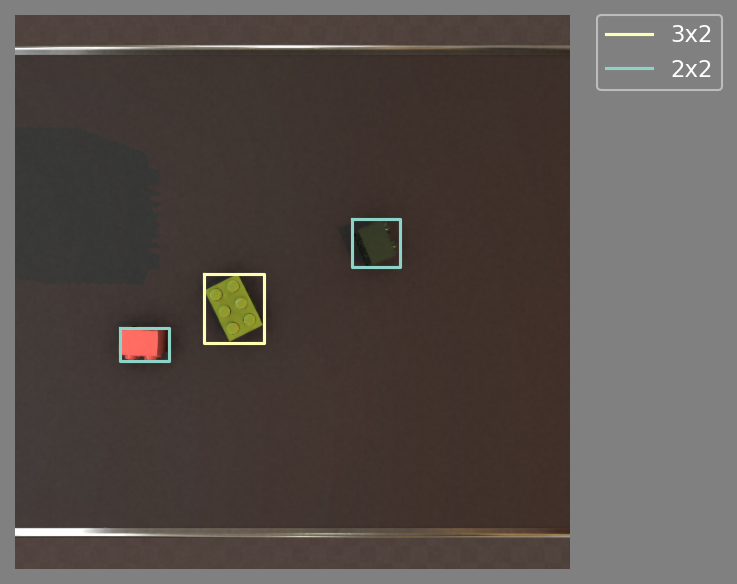


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_135.bmp: 640x640 4 2x2s, 1 3x2, 2 6x2s, 133.7ms
Speed: 7.1ms preprocess, 133.7ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


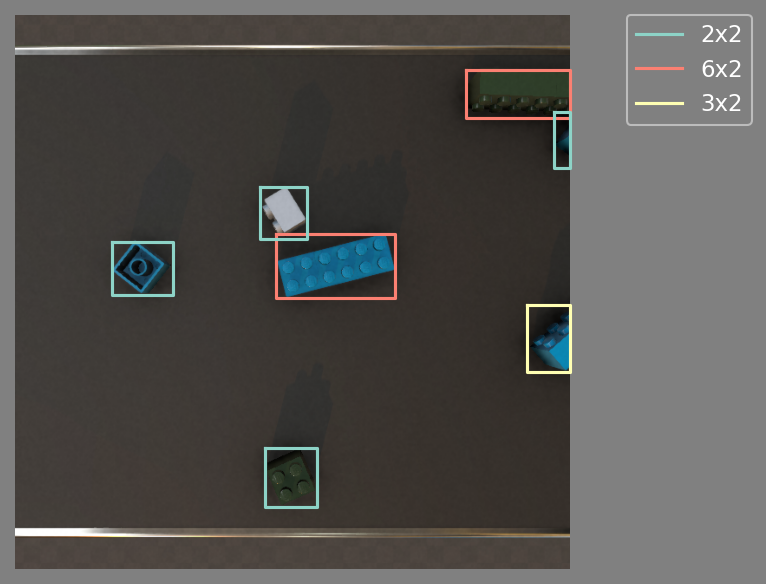


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_136.bmp: 640x640 1 4x2, 2 6x2s, 188.8ms
Speed: 8.4ms preprocess, 188.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


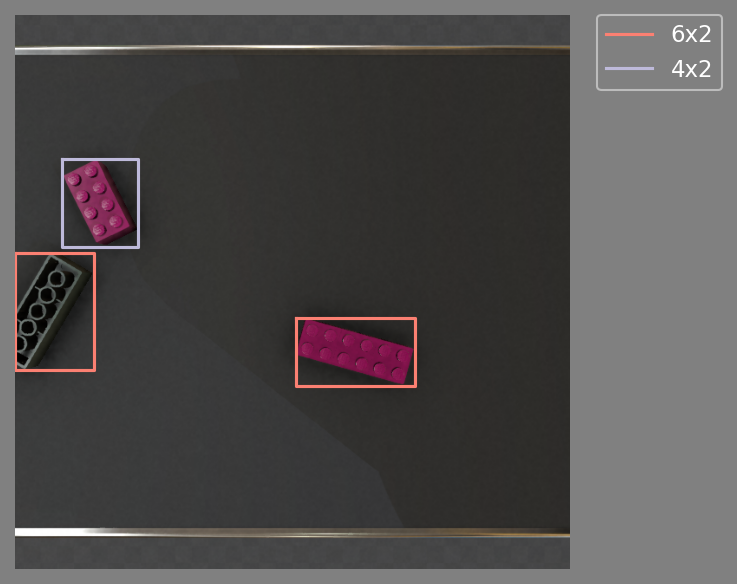


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_140.bmp: 640x640 1 2x2, 1 3x2, 1 4x2, 1 6x2, 133.8ms
Speed: 74.3ms preprocess, 133.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


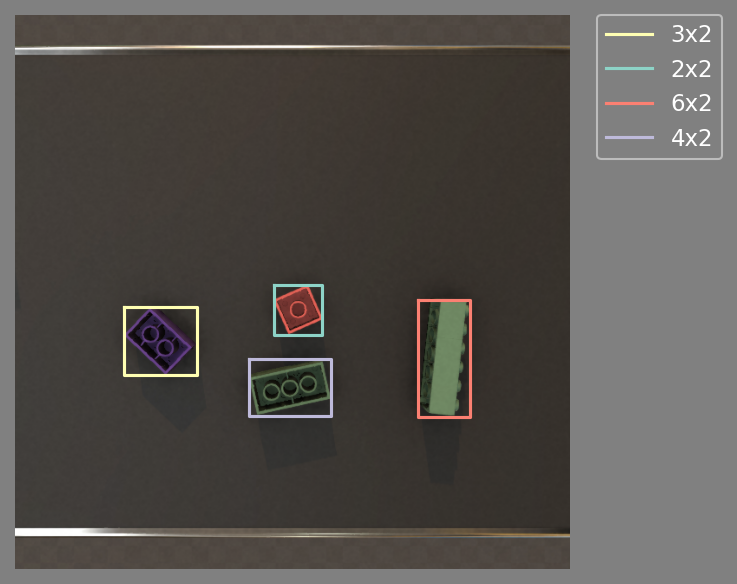


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_146.bmp: 640x640 2 2x2s, 3 4x2s, 1 6x2, 132.3ms
Speed: 6.5ms preprocess, 132.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


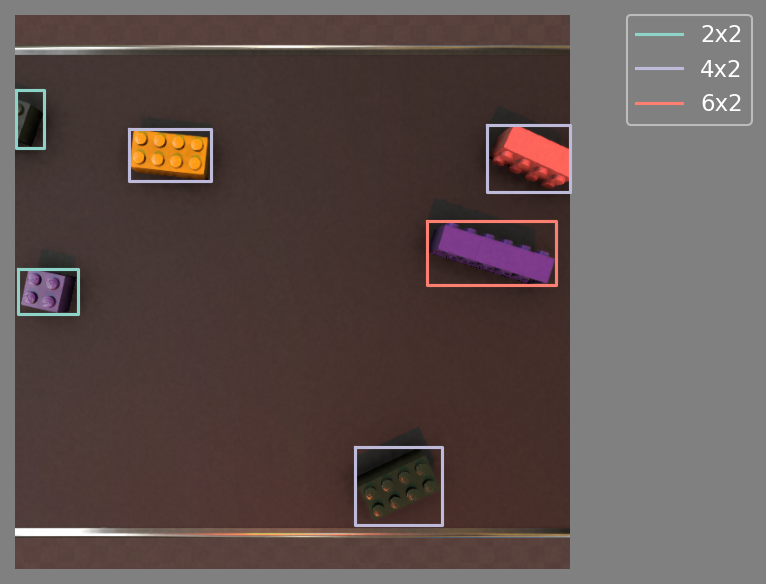


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_153.bmp: 640x640 1 2x2, 2 4x2s, 2 6x2s, 180.3ms
Speed: 7.1ms preprocess, 180.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


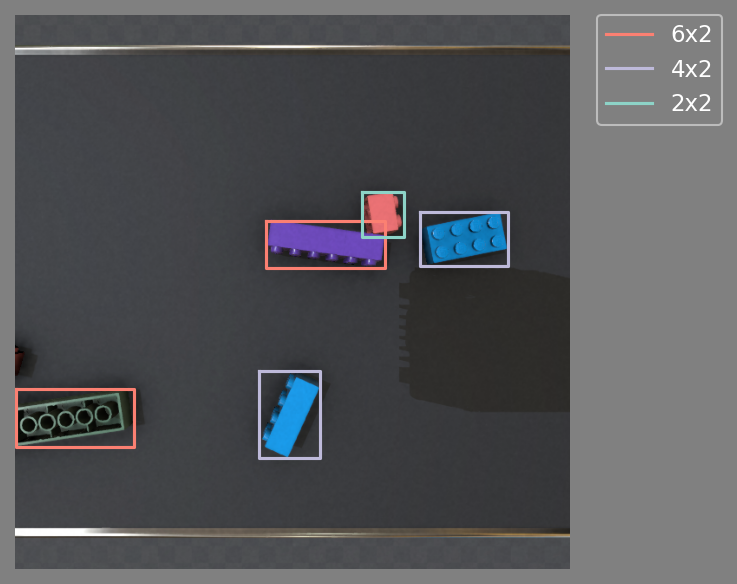


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_159.bmp: 640x640 3 2x2s, 1 3x2, 2 4x2s, 1 6x2, 135.7ms
Speed: 6.0ms preprocess, 135.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


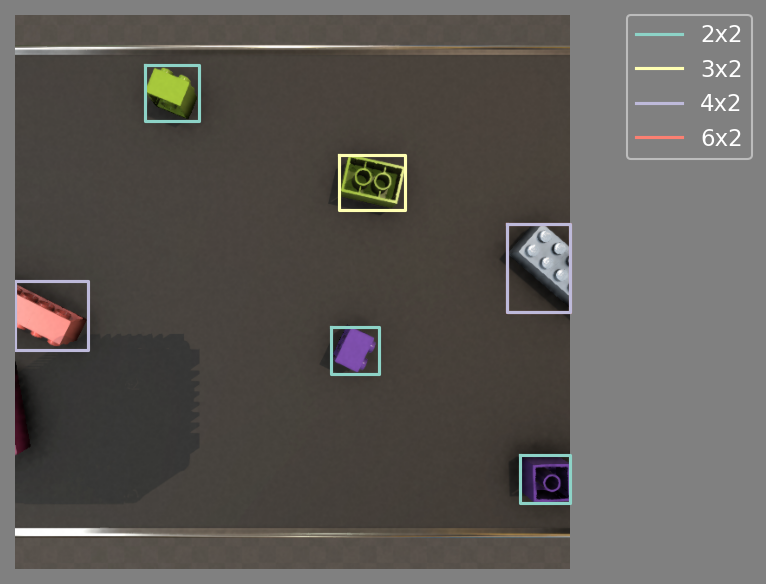


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_163.bmp: 640x640 2 3x2s, 2 4x2s, 195.8ms
Speed: 9.9ms preprocess, 195.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


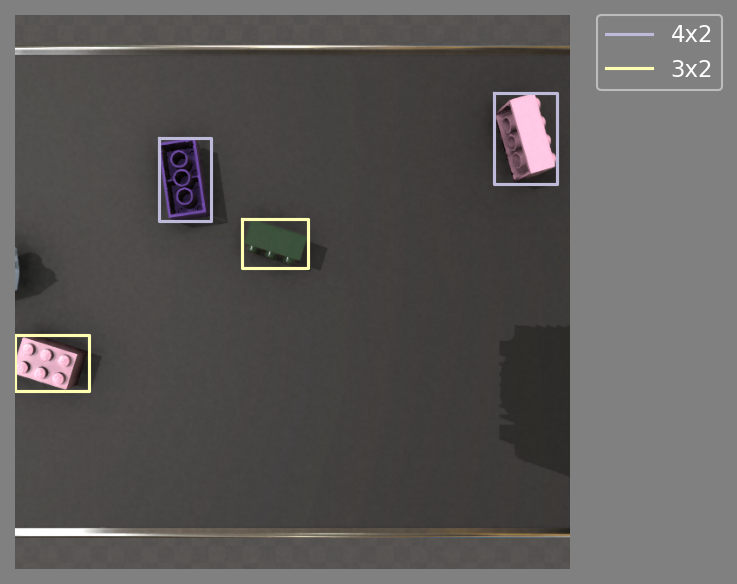


image 1/1 C:\Users\VincentRoller\Desktop\lego-demo\images\val\sample_164.bmp: 640x640 1 2x2, 2 3x2s, 3 4x2s, 107.7ms
Speed: 6.7ms preprocess, 107.7ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)


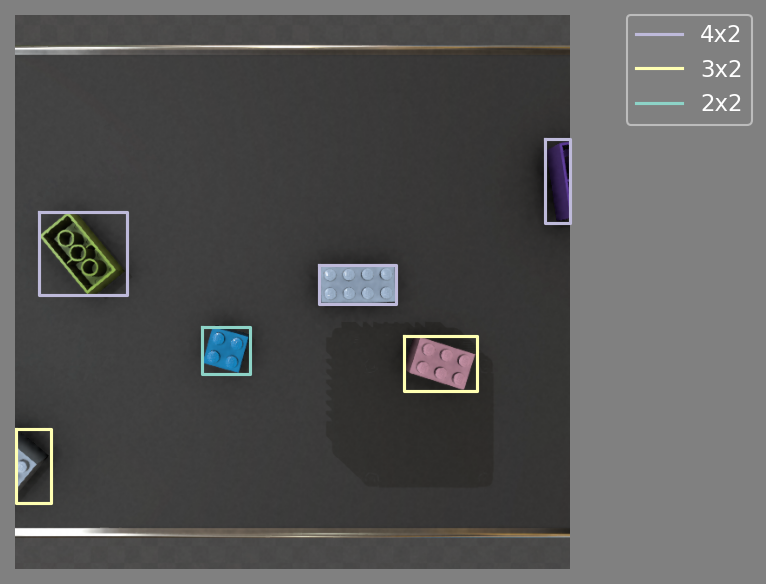

In [29]:
for i in range(20):
    sample = samples[i]
    results = model.predict(
        sample,
        imgsz=train_config['imgsz'],
        conf=0.25,  # default is 0.25
    )


    rvy.show_results(results, model)